In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os

sys.path.insert(0, '/home/aew492/CFE_gradients/code')
import load_tools
import globals
globals.initialize_vals()

In [3]:
# Ls = [500, 750, 1000, 1500]
L = 750
ns = ['1e-4']
grad_dim = 2
m = 1

density 1e-4:


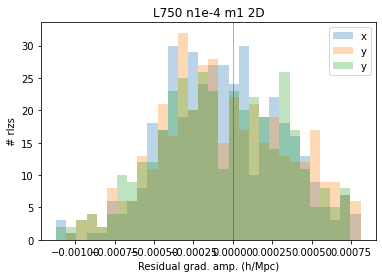

In [4]:
i = 0
while i < len(ns):
    print(f"density {ns[i]}:")
    try:
        load_tools.check_grad_amps(L, ns[i], grad_dim, m, title=f'L{L} n{ns[i]} m{m} {grad_dim}D')
    except FileNotFoundError:
        print(f"not found, moving to the next.")
    finally:
        if i==len(ns):
            break
        i += 1

In [5]:
cat_tag = 'L750_n1e-4_z057_patchy_As2x'
mock_dict = np.load(os.path.join(globals.data_dir, f'catalogs/gradient/2D/{cat_tag}/{cat_tag}_rlz0_m-1.000-L_b-0.500.npy'), allow_pickle=True).item()

In [7]:
mock_dict['grad_input'], mock_dict['w_hat'], mock_dict['grad_expected']

(array([0.00163299, 0.00094281, 0.        ]),
 array([0.8660254, 0.5      , 0.       ]),
 array([0.00163299, 0.00094281, 0.        ]))